In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [167]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import math as mt
import datetime as dt
import random as ran
from sklearn.metrics.pairwise import euclidean_distances as euc

# 한글출력
matplotlib.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

from src.dbc import TimeDivisionKMeans
from src.dbc.utils import data_preprocessing, \
        dimension_reduction, \
        calc_contribution, \
        calc_contribution_rank, \
        remove_anomaly

import src.crs as crs

# 1. Load Excel

In [555]:
# 1. load_excel

# data/apt_all.xlsx
# data/apt_1.xlsx
# data/apt_3.xlsx
# data/apt_4.xlsx
# data/apt_std_nugin_1_3.xlsx

data_path = "data/apt_1.xlsx"
xlsx = pd.read_excel(data_path, header=None,
                     skiprows=2, engine="openpyxl")

# 2. data preprocessing
df = data_preprocessing(xlsx)

# 3. dimension_reduction
df = dimension_reduction(df)

# 4. day clustering
copy_df = df.copy()

In [556]:
df = copy_df[:24 * 31]
size = 3
tdKMeans = TimeDivisionKMeans(df, size=size)

df.head()

,아파트1-104-1206,아파트1-104-303,아파트1-104-1307,아파트1-104-1208,아파트1-104-408,아파트1-104-203,아파트1-103-1402,아파트1-103-402,아파트1-103-1201,아파트1-103-801,...,아파트1-102-901,아파트1-103-1905,아파트1-103-503,아파트1-103-1504,아파트1-103-606,아파트1-103-903,아파트1-103-1106,아파트1-103-705,아파트1-103-1505,아파트1-103-406
2018-05-01 00:00:00,0.341,0.121,0.245,0.009,0.085,0.154,0.161,0.311,0.358,0.177,...,0.372,0.181,0.322,0.374,0.571,0.453,0.161,0.127,0.259,0.364
2018-05-01 01:00:00,0.337,0.186,0.285,0.010,0.071,0.127,0.179,0.225,0.206,0.178,...,0.245,0.238,0.292,0.382,0.327,0.352,0.172,0.133,0.234,0.286
2018-05-01 02:00:00,0.324,0.214,0.487,0.009,0.061,0.139,0.182,0.221,0.150,0.152,...,0.245,0.250,0.287,0.320,0.359,0.366,0.242,0.219,0.197,0.368
2018-05-01 03:00:00,0.319,0.250,0.300,0.009,0.067,0.132,0.172,0.274,0.142,0.205,...,0.177,0.223,0.329,0.170,0.322,0.267,0.269,0.164,0.229,0.414
2018-05-01 04:00:00,0.235,0.199,0.107,0.009,0.047,0.131,0.153,0.255,0.139,0.169,...,0.129,0.171,0.301,0.168,0.351,0.255,0.170,0.132,0.198,0.318


# 2. Run Clustering (3시간 단위로 클러스터링)

In [557]:
tdKMeans.init_setting()
hc, ci = tdKMeans.run()

hc.head()

10 / 248 ==> 86.59628456977627
20 / 248 ==> 81.16252768940994
30 / 248 ==> 82.62407187603552
40 / 248 ==> 80.8982220404376
50 / 248 ==> 84.25121368312583
60 / 248 ==> 80.21798294709647
70 / 248 ==> 82.01139783218416
80 / 248 ==> 80.41526438524886
90 / 248 ==> 87.66525286406126
100 / 248 ==> 80.32218163901051
110 / 248 ==> 82.35355849704362
120 / 248 ==> 80.7231873902038
130 / 248 ==> 87.12131053083898
140 / 248 ==> 84.21334358808198
150 / 248 ==> 86.6867563778323
160 / 248 ==> 87.2522481574432
170 / 248 ==> 86.63394504013854
180 / 248 ==> 80.0380101396066
190 / 248 ==> 81.37290780411534
200 / 248 ==> 84.2921709177528
210 / 248 ==> 86.32142855037127
220 / 248 ==> 82.07374767570661
230 / 248 ==> 82.59293459876208
240 / 248 ==> 84.23777025901926
248 / 248 ==> 82.01760970233917


,아파트1-104-1206,아파트1-104-303,아파트1-104-1307,아파트1-104-1208,아파트1-104-408,아파트1-104-203,아파트1-103-1402,아파트1-103-402,아파트1-103-1201,아파트1-103-801,...,아파트1-102-901,아파트1-103-1905,아파트1-103-503,아파트1-103-1504,아파트1-103-606,아파트1-103-903,아파트1-103-1106,아파트1-103-705,아파트1-103-1505,아파트1-103-406
0,1.0,4.0,1.0,5.0,5.0,5.0,4.0,3.0,3.0,4.0,...,3.0,4.0,2.0,1.0,0.0,1.0,4.0,4.0,2.0,1.0
1,2.0,2.0,6.0,3.0,3.0,0.0,0.0,6.0,0.0,2.0,...,0.0,6.0,1.0,0.0,1.0,6.0,6.0,6.0,6.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,6.0,6.0,1.0,6.0,...,1.0,3.0,0.0,6.0,5.0,3.0,5.0,6.0,0.0,3.0
3,4.0,4.0,4.0,4.0,4.0,0.0,0.0,0.0,5.0,4.0,...,4.0,5.0,0.0,2.0,2.0,2.0,4.0,0.0,0.0,2.0
4,5.0,4.0,4.0,4.0,4.0,5.0,3.0,3.0,2.0,5.0,...,2.0,0.0,0.0,2.0,1.0,3.0,4.0,3.0,3.0,1.0


# 3. Contribution Map

In [558]:
contribution_df = calc_contribution_rank(hc, ci)
contribution_df.index = df.index[::size] 

contribution_df.head()

rank!


,아파트1-104-1206,아파트1-104-303,아파트1-104-1307,아파트1-104-1208,아파트1-104-408,아파트1-104-203,아파트1-103-1402,아파트1-103-402,아파트1-103-1201,아파트1-103-801,...,아파트1-102-901,아파트1-103-1905,아파트1-103-503,아파트1-103-1504,아파트1-103-606,아파트1-103-903,아파트1-103-1106,아파트1-103-705,아파트1-103-1505,아파트1-103-406
2018-05-01 00:00:00,6.0,2.0,6.0,1.0,1.0,1.0,2.0,4.0,4.0,2.0,...,4.0,2.0,3.0,6.0,6.0,6.0,2.0,2.0,3.0,6.0
2018-05-01 03:00:00,4.0,4.0,5.0,1.0,1.0,3.0,3.0,5.0,3.0,4.0,...,3.0,5.0,6.0,3.0,6.0,5.0,5.0,5.0,5.0,6.0
2018-05-01 06:00:00,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,...,1.0,4.0,5.0,2.0,3.0,4.0,3.0,2.0,5.0,4.0
2018-05-01 09:00:00,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,6.0,1.0,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,2.0,2.0,5.0
2018-05-01 12:00:00,2.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,4.0,2.0,...,4.0,5.0,5.0,4.0,6.0,3.0,1.0,3.0,3.0,6.0


# 4. Remove Anomaly Contribution Household

In [559]:
cont_mean_df = remove_anomaly(df, contribution_df)

cont_mean_df.head()

,contribution
아파트1-104-1206,3.0
아파트1-104-303,2.0
아파트1-104-1307,3.0
아파트1-104-1208,1.0
아파트1-104-408,1.0


# 5. 각 기여도 그룹별로 많이 속해있었던 클러스터링을 해당 기여도 그룹의 대표 클러스터링으로 산출

In [560]:
# Cluster by Contribution GroupBy
cc = pd.DataFrame()
cont_group = set(cont_mean_df.values.flatten())

for group in cont_group:
    group_cols = cont_mean_df[cont_mean_df['contribution'] == group].index
    _hc = hc[group_cols].T.copy()
    _clusters = np.array([])
    
    for idx in range(0, len(hc)):
        _group = _hc[idx].groupby(_hc[idx]).count()
        max_cluster = _group.argmax()

        _clusters = np.append(_clusters,
                              _group.keys()[max_cluster])
    
    cc["기여도 그룹 {}".format(int(group))] = _clusters
    
cc.head()

,기여도 그룹 1,기여도 그룹 2,기여도 그룹 3,기여도 그룹 4,기여도 그룹 5,기여도 그룹 6
0,5.0,4.0,4.0,1.0,1.0,6.0
1,3.0,0.0,0.0,6.0,1.0,5.0
2,1.0,1.0,6.0,6.0,2.0,0.0
3,4.0,4.0,0.0,0.0,1.0,2.0
4,4.0,5.0,5.0,3.0,2.0,1.0


# 6. Pattern Matching

In [561]:
cc_cols = cc.columns
_cc_pattern = np.array([])

for cc_col in cc_cols:
    _cc = cc[cc_col]
    for division_round, _cc in enumerate(_cc):
        _round_pattern = ci[division_round][0][int(_cc)]
        
        _cc_pattern = np.append(_cc_pattern,_round_pattern)
        
cc_pattern = pd.DataFrame(_cc_pattern.reshape(-1,len(cc) * 3),
                         index=cc_cols,
                         columns=df.index).T
cc_pattern.head()

,기여도 그룹 1,기여도 그룹 2,기여도 그룹 3,기여도 그룹 4,기여도 그룹 5,기여도 그룹 6
2018-05-01 00:00:00,0.114,0.183,0.183,0.364,0.364,0.675
2018-05-01 01:00:00,0.091,0.187,0.187,0.345,0.345,0.571
2018-05-01 02:00:00,0.090,0.192,0.192,0.363,0.363,0.476
2018-05-01 03:00:00,0.049,0.148,0.148,0.234,0.354,0.481
2018-05-01 04:00:00,0.037,0.154,0.154,0.225,0.311,0.467


# 7. Group - Cluster Pattern Visualization

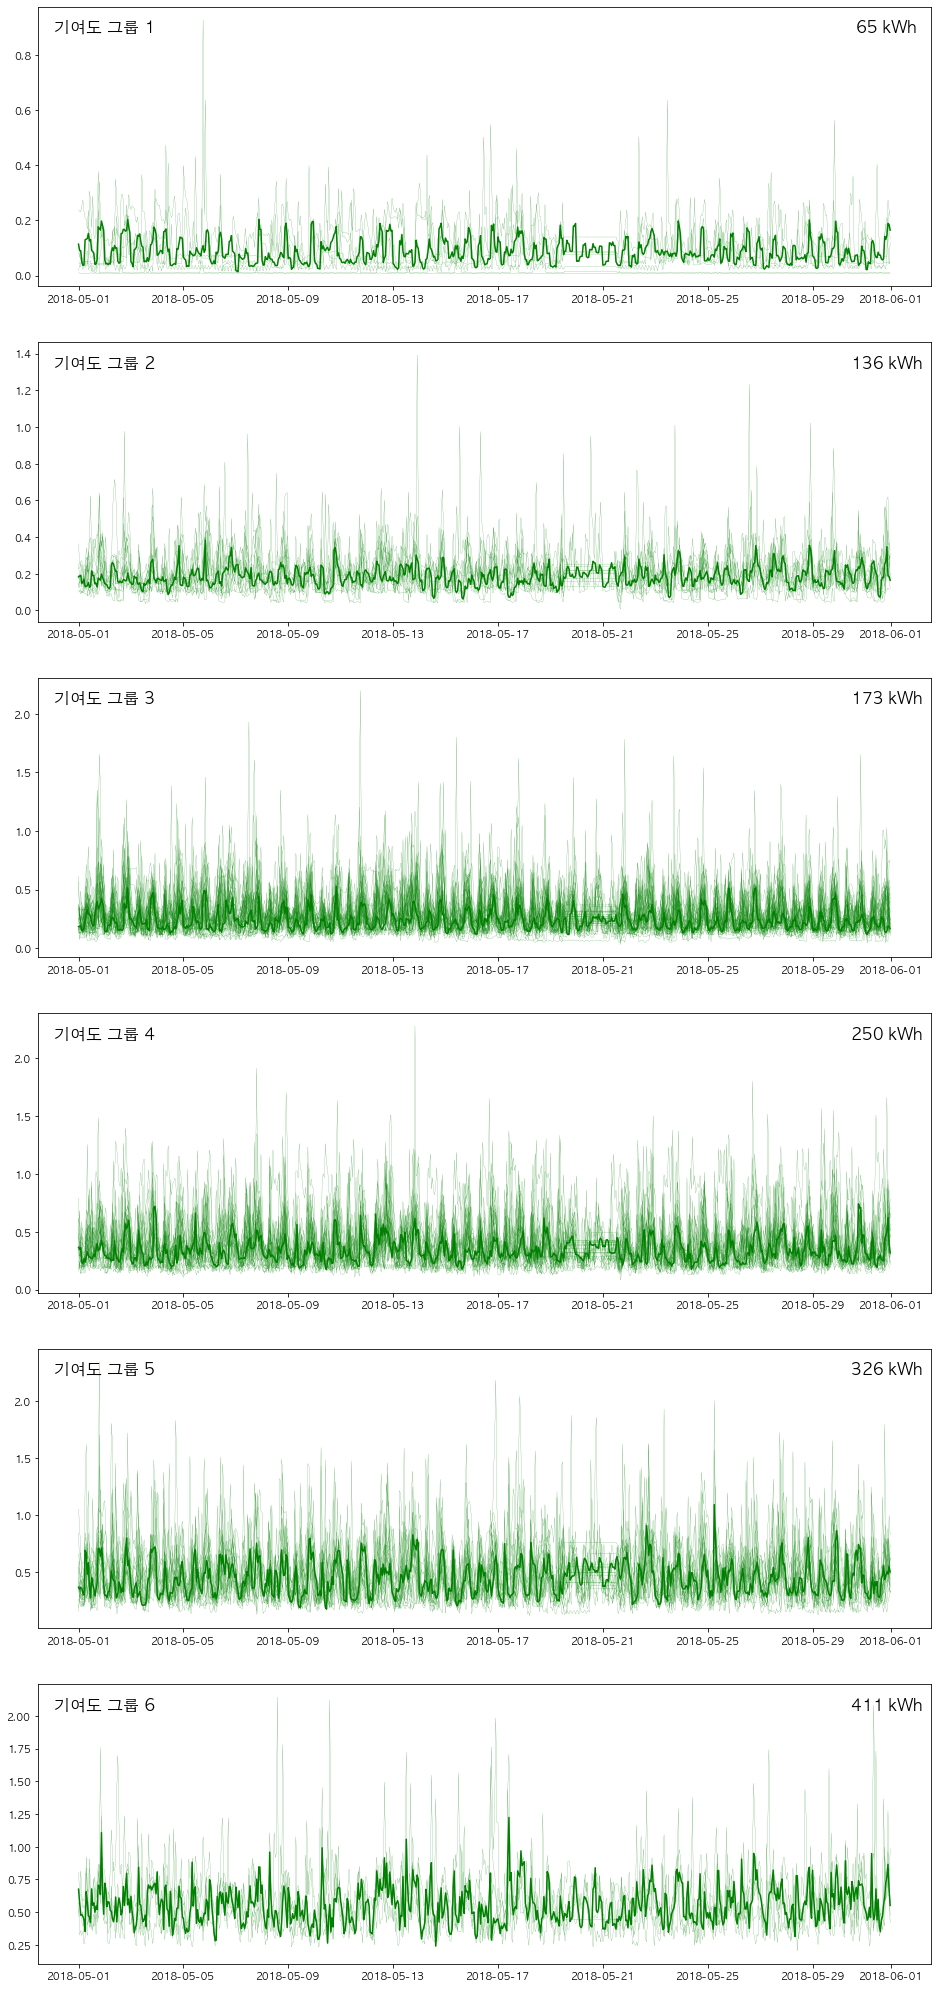

In [562]:
fig, ax = plt.subplots(len(cc_cols),1, figsize=(16, 6 * len(cc_cols)))

for group_idx,group in enumerate(cont_group):
    cols = df.columns
    _group_cols = cols[(cont_mean_df['contribution'] == group).values]

    ax[group_idx].plot(df[_group_cols], linewidth=0.15, color='g')
    ax[group_idx].plot(cc_pattern[cc_cols[group_idx]], linewidth=1.5, color='g')
    ax[group_idx].text(0.075, 0.925, cc_cols[group_idx], 
                       ha='center', 
                       va='center',
                       fontsize=16,
                       transform=ax[group_idx].transAxes)
    ax[group_idx].text(0.95, 0.925, "{} kWh".format(round(cc_pattern[cc_cols[group_idx]].sum())), 
                       ha='center', 
                       va='center',
                       fontsize=16,
                       transform=ax[group_idx].transAxes)

plt.show()

# CRS

In [563]:
p,m = crs.utils.data_preprocessing(xlsx)

m.head()

/Users/formegusto/Desktop/idoformegusto/development/research/distribution-by-contribution/src/crs/utils/data_preprocessing.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  datas_df[household_name] = household_df[col][3:].to_list()
/Users/formegusto/Desktop/idoformegusto/development/research/distribution-by-contribution/src/crs/utils/data_preprocessing.py:49: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  month_usage_df[name] = [


,month,아파트1-101-1002,아파트1-101-104,아파트1-101-1102,아파트1-101-1202,아파트1-101-1302,아파트1-101-1401,아파트1-101-1403,아파트1-101-1502,아파트1-101-1504,...,아파트1-104-303,아파트1-104-404,아파트1-104-408,아파트1-104-503,아파트1-104-507,아파트1-104-606,아파트1-104-705,아파트1-104-708,아파트1-104-902,아파트1-104-905
0,1,253,689,183,239,455,343,380,219,389,...,10,111,39,151,181,180,290,184,176,148
1,2,251,481,177,218,397,297,339,197,348,...,77,107,30,114,151,151,263,177,158,127
2,3,255,424,203,222,378,303,349,202,357,...,77,120,28,116,163,157,281,182,171,127
3,4,252,355,180,230,368,278,298,188,346,...,76,64,58,109,151,148,257,175,140,121
4,5,230,357,258,203,414,270,418,156,320,...,150,63,75,137,115,13,84,149,36,117


In [564]:
# 3. bill - calc
min_per = 10
max_per = 80
bc_result = crs.utils.bill_calc(m, p, min_per, max_per)

In [565]:
# 일반분석
na_result = crs.utils.normal_analysis(bc_result)

# 기여도 그룹별로 종합계약에 유리한지 단일계약에 유리한지 확인하기

In [566]:
# 28 percentage 지점에서 변화를 보임 (추천 계약 시스템 상에서 단일계약의 최상위 percentage)
month = df.index[0].month

positive_count_per = int(na_result['pos_change_per']['positive_count'][month - 1] - 1)

comp_public_bill = int(bc_result['public_bill']['comp'].loc[month][str(positive_count_per)])
single_public_bill = int(bc_result['public_bill']['single'].loc[month][str(positive_count_per)])

comp_pos_cnt = int(na_result['positive_count']['comp'].loc[month][str(positive_count_per)])
single_pos_cnt = int(na_result['positive_count']['single'].loc[month][str(positive_count_per)])

print("공동설비사용량 {}% 지점의 정보 {} : {}".format(positive_count_per, comp_pos_cnt, single_pos_cnt))
print("• 종합계약 공동설비사용요금 : {}원".format(format(comp_public_bill, ",")))
print("   • 1인당 지불해야 하는 요금 : {}원".format(format(round(comp_public_bill / len(df.columns)), ",")))
print("• 단일계약 공동설비사용요금 : {}원".format(format(single_public_bill, ",")))
print("   • 1인당 지불해야 하는 요금 : {}원".format(format(round(single_public_bill / len(df.columns)), ",")))

공동설비사용량 27% 지점의 정보 50 : 58
• 종합계약 공동설비사용요금 : 968,710원
   • 1인당 지불해야 하는 요금 : 8,970원
• 단일계약 공동설비사용요금 : 1,504,690원
   • 1인당 지불해야 하는 요금 : 13,932원


# 종합계약 유리 가구, 단일계약 유리 가구 분리

In [567]:
comp_bill = bc_result['households_bill']['comp'][month - 1]
single_bill = bc_result['households_bill']['single'][month - 1]

bill_cols = comp_bill.columns

pos_comp_cols = bill_cols[comp_bill.loc[positive_count_per] < single_bill.loc[positive_count_per]]
pos_single_cols = bill_cols[comp_bill.loc[positive_count_per] > single_bill.loc[positive_count_per]]

# 속한 기여도 그룹 확인

종합계약 유리 가구 수 기여도 그룹 : {1.0, 2.0, 3.0}
단일계약 유리 가구 수 기여도 그룹 : {3.0, 4.0, 5.0, 6.0}


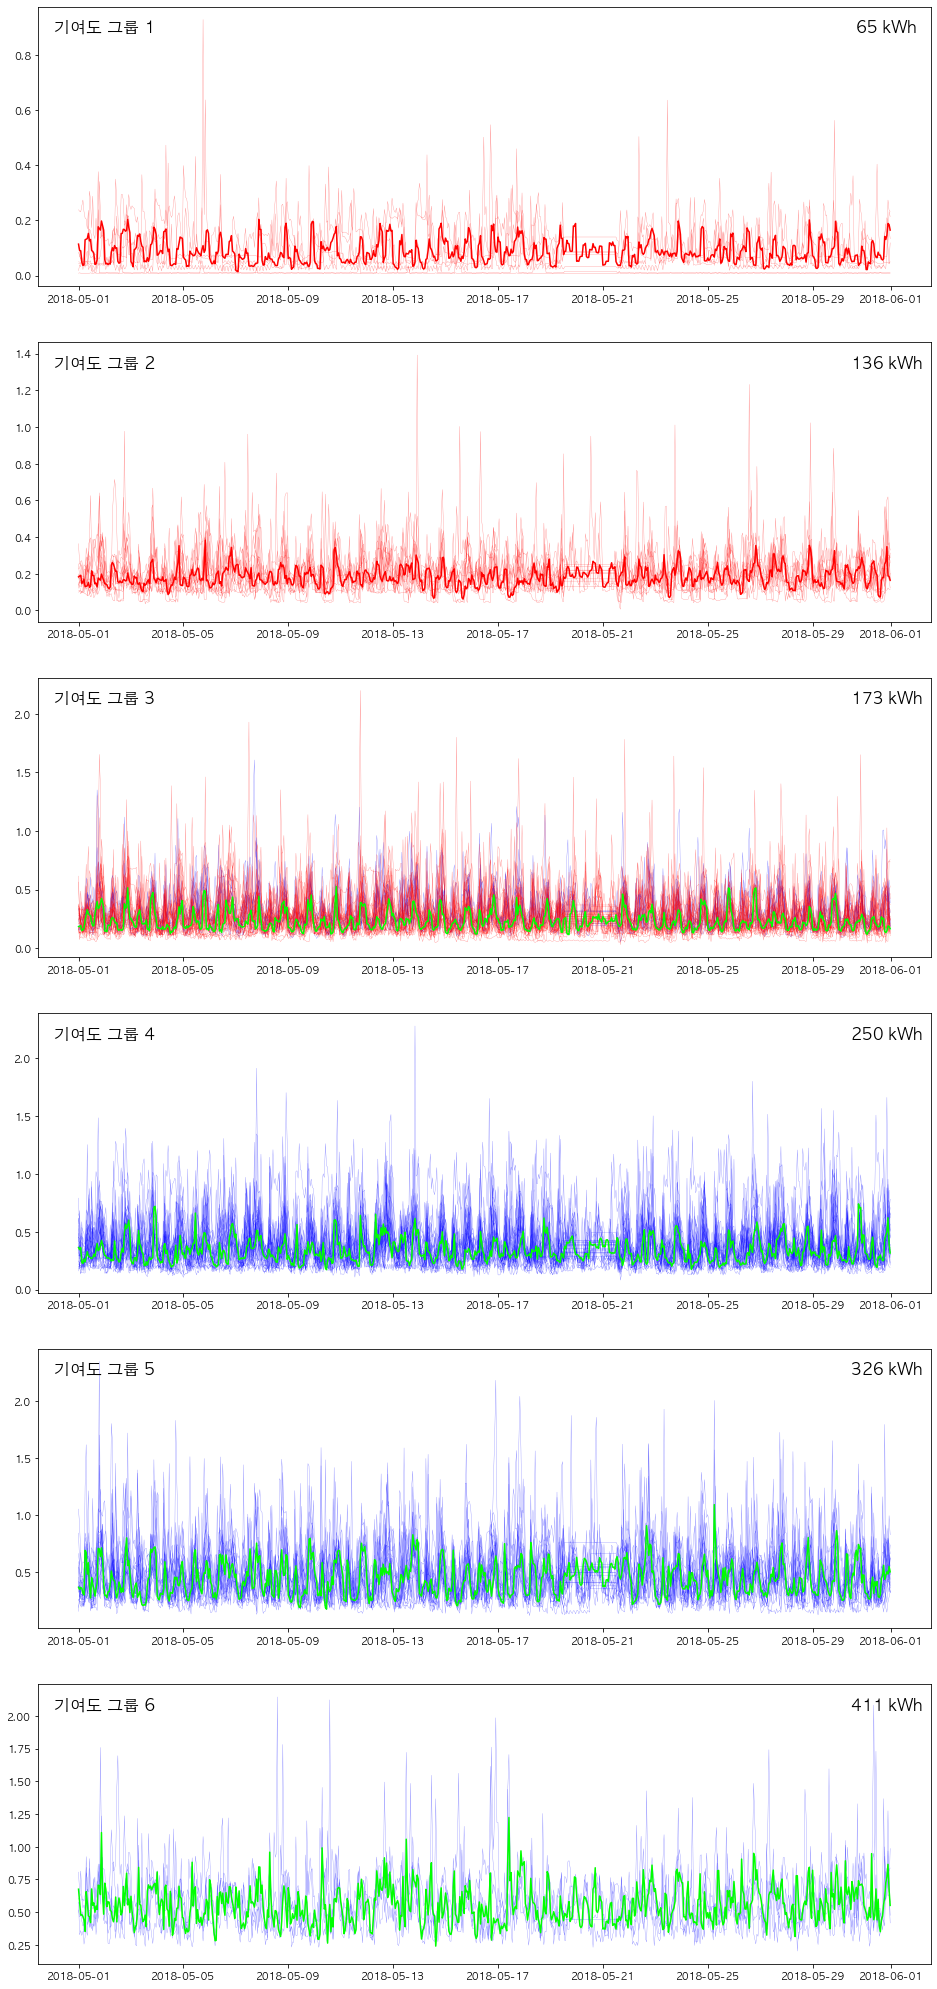

In [568]:
comp_cont_df = cont_mean_df.loc[pos_comp_cols]
single_cont_df = cont_mean_df.loc[pos_single_cols]

print("종합계약 유리 가구 수 기여도 그룹 : {}".format(set(comp_cont_df['contribution'])))
print("단일계약 유리 가구 수 기여도 그룹 : {}".format(set(single_cont_df['contribution'])))

fig, ax = plt.subplots(len(cc_cols),1, figsize=(16, 6 * len(cc_cols)))

for group_idx,group in enumerate(cont_group):
    cols = df.columns
    _group_cols = cols[(cont_mean_df['contribution'] == group).values]
    _comp_win_cnt = 0
    
    for _c in _group_cols:
        ax[group_idx].plot(df[_c], linewidth=0.3, color="r" if _c in pos_comp_cols else "b", alpha=0.5,
                          label="종합계약 유리 가구" if _c in pos_comp_cols else "단일계약 유리 가구")
        if _c in pos_comp_cols:
            _comp_win_cnt += 1
        
    ax[group_idx].plot(
        cc_pattern[cc_cols[group_idx]], linewidth=1.5, color='r' if _comp_win_cnt == len(_group_cols) else 'lime')
    ax[group_idx].text(0.075, 0.925, cc_cols[group_idx], 
                       ha='center', 
                       va='center',
                       fontsize=16,
                       transform=ax[group_idx].transAxes)
    ax[group_idx].text(0.95, 0.925, "{} kWh".format(round(cc_pattern[cc_cols[group_idx]].sum())), 
                       ha='center', 
                       va='center',
                       fontsize=16,
                       transform=ax[group_idx].transAxes)

plt.show()

# 그룹별로 손해 이익 계산
- 가격 분배 1 : 보상제

In [569]:
loss_bill = pd.DataFrame(comp_bill.loc[positive_count_per] - single_bill.loc[positive_count_per])

loss_bill.columns = ["오차"]
loss_bill.head()

,오차
아파트1-101-1002,218.0
아파트1-101-104,6078.0
아파트1-101-1102,1508.0
아파트1-101-1202,-1022.0
아파트1-101-1302,10128.0


In [570]:
cont_loss_df = pd.DataFrame(index=['그룹 멤버','클러스터링 그룹 사용량','손해', '이익', '인당청구금액','공동설비총액'])
personal_public = round(single_public_bill / len(df.columns))
      
for group_idx,group in enumerate(cont_group):
    cc_col = cc_cols[group_idx]
    _group_cols = cols[(cont_mean_df['contribution'] == group).values]
    
    _loss_bill = loss_bill.loc[_group_cols]
    
    loss = _loss_bill[_loss_bill['오차'] < 0].sum()
    profit = _loss_bill[_loss_bill['오차'] > 0].sum()
    
    cont_loss_df[cc_col] = [int(len(_group_cols)),
                            int(cc_pattern[cc_col].sum().round()),
                            int(loss['오차']),int(profit['오차']),
                            int(personal_public),
                            int(personal_public * len(_group_cols))]
    
cont_loss_df

,기여도 그룹 1,기여도 그룹 2,기여도 그룹 3,기여도 그룹 4,기여도 그룹 5,기여도 그룹 6
그룹 멤버,7,12,37,27,20,5
클러스터링 그룹 사용량,65,136,173,250,326,411
손해,-35574,-47964,-64522,0,0,0
이익,0,0,1218,62276,106460,49070
인당청구금액,13932,13932,13932,13932,13932,13932
공동설비총액,97524,167184,515484,376164,278640,69660


### 공동설비고유누진단계, 공동설비시작누진단계

In [571]:
households_kWh = df.values.sum().round()
APT = round((households_kWh * 100) / (100 - positive_count_per))
public_kWh = APT - households_kWh

print("세대부 사용량 : {}kwh {}kWh".format(format(int(households_kWh), ","),
                                           format(round(households_kWh / len(df.columns)), ",")))
print("공용부 사용량 : {}kwh {}kWh\n".format(format(int(public_kWh), ","),
                                           format(round(public_kWh / len(df.columns)), ",")))

nugin_step = [0, 201, 401]
og_public_step = 0
start_public_step = 0

# 고유 누진 단계 계산
_temp = round(public_kWh / len(df.columns))
for step in nugin_step:
    og_public_step +=1
    if _temp <= 200:
        _temp -= 200
        break
        
print("공동설비고유누진단계: {}단계".format(og_public_step))

_temp = round(households_kWh / len(df.columns))
for step in nugin_step:
    start_public_step +=1
    if _temp <= 200:
        break
    else:
        _temp -= 200
print("공동설비시작누진단계: {}단계".format(start_public_step))

세대부 사용량 : 25,867kwh 240kWh
공용부 사용량 : 9,567kwh 89kWh

공동설비고유누진단계: 1단계
공동설비시작누진단계: 2단계


- 가격 분배 2: 클러스터링 사용량만큼 모두 이렇게 사용했다면 나는?

In [572]:
public_if_cluster_usage = list()
personal_if_cluster_usage = list()

for cc_col in cc_cols:
    cluster_usage_df = pd.DataFrame(df.sum()).T
    _group_cols = cols[(cont_mean_df['contribution'] == group).values]

    cluster_usage_df.loc[0] = cc_pattern[cc_col].sum().round()
    cluster_usage_df['month'] = 1

    _bc_result = crs.utils.bill_calc(cluster_usage_df, p, min_per, max_per)
    _na_result = crs.utils.normal_analysis(_bc_result)
    
    public_bill = _bc_result['public_bill']['single'].loc[1][str(positive_count_per - 1)]
    personal_public_bill = public_bill / len(df.columns)

    public_if_cluster_usage.append(int(personal_public_bill * len(_group_cols)))
    personal_if_cluster_usage.append(int(personal_public_bill))
    
cont_loss_df.loc['모두가 그룹 만큼 사용했다면(인당),'] = personal_if_cluster_usage
cont_loss_df.loc['모두가 그룹 만큼 사용했다면,'] = public_if_cluster_usage

cont_loss_df

,기여도 그룹 1,기여도 그룹 2,기여도 그룹 3,기여도 그룹 4,기여도 그룹 5,기여도 그룹 6
그룹 멤버,7,12,37,27,20,5
클러스터링 그룹 사용량,65,136,173,250,326,411
손해,-35574,-47964,-64522,0,0,0
이익,0,0,1218,62276,106460,49070
인당청구금액,13932,13932,13932,13932,13932,13932
공동설비총액,97524,167184,515484,376164,278640,69660
"모두가 그룹 만큼 사용했다면(인당),",4833,6975,11373,14471,27557,34863
"모두가 그룹 만큼 사용했다면,",24166,34878,56867,72358,137786,174317


In [574]:
cont_loss_df.loc['인당청구금액'] - cont_loss_df.loc['모두가 그룹 만큼 사용했다면(인당),']

기여도 그룹 1     9099
기여도 그룹 2     6957
기여도 그룹 3     2559
기여도 그룹 4     -539
기여도 그룹 5   -13625
기여도 그룹 6   -20931
dtype: int64